In [72]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import random
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
# Our libraries
from proj1_helpers import *
from proj1_input_man import *
from proj1_linear_model import *
from proj1_ridge_regress import *
from proj1_logistic import *
import seaborn as sn

## Load the training data into feature matrix, class labels, and event ids:

In [74]:
DATA_TRAIN_PATH = '../data/train.csv' # train data path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [75]:
print(tX.shape)

(250000, 30)


### Exploratory data analysis

In [76]:
one_indeces = np.where(y==1)[0]
minus_one_indeces = np.where(y==-1)[0]

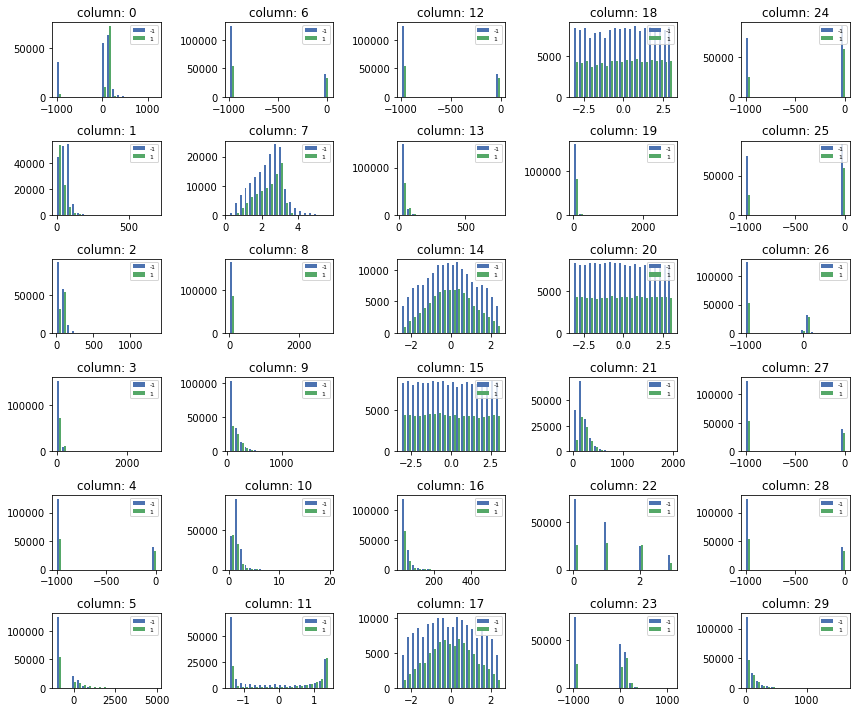

In [77]:
fig, ax = plt.subplots(6,5,figsize= (12,10), sharey = False, sharex = False)
plt.style.use('seaborn-deep')
for i in range(tX.shape[1]):
    sbplt = ax[i%6, math.floor(i/6)]
    sbplt.hist([tX[minus_one_indeces,i], tX[one_indeces,i]],bins = 20, label = ['-1', '1'])
    sbplt.legend(loc='upper right', prop={'size': 6})
    sbplt.set_title('column: {}'.format(i))
    
fig.tight_layout()

### Changing the labels to {0,1}

In [78]:
# change the array from -1 1 to 0 1
# label simplification
# y == 0 non detected Boson, y == 1 detected Boson
y_ = np.array([0 if l == -1 else 1 for l in y])

# All of the following parts are the same for the test set, should be functions

# less code = better code (in this case)

### Dividing the features by the number of jets

In [79]:
tX_0,tX_1,tX_2_3 = split_to_Jet_Num(tX)

### Dividing also the output by the type of particle

In [80]:
y_0,y_1,y_2_3 = split_labels_to_Jet_Num(y_,tX)

### Adding a column of zeros and ones to detect whether the mass has been measured or not

In [81]:
# take the indices where the mass is not calculated, add the column which has 0 in those indices
# and 1 everywhere else for all matrices 0,1,2_3
tX_0 = find_mass(tX_0)
tX_1 = find_mass(tX_1)
tX_2_3 = find_mass(tX_2_3)

### Throwing away the outliers from the training data

In [82]:
tX_0 = fix_array(tX_0,0)
print(tX_0.shape)
tX_1 = fix_array(tX_1,1)
print(tX_1.shape)
tX_2_3 = fix_array(tX_2_3)
print(tX_2_3.shape)

[5, 6, 7, 13, 23, 24, 25, 26, 27, 28, 29]
(99913, 19)
(99913, 19)
[5, 6, 7, 13, 26, 27, 28]
(77544, 23)
(77544, 23)
(72543, 31)
(72543, 31)


### Now we substitute the -999 values with the median

In [83]:
tX_0 = fix_mean(tX_0)
tX_1 = fix_mean(tX_1)
tX_2_3 = fix_mean(tX_2_3)

### Now we standardize the data

In [84]:
tX_2_3[:,1:], mean_2_3,std_2_3 = standardize(tX_2_3[:,1:]) #we standardize everything a part from the column added manually
tX_0[:,1:],mean_0,std_0 = standardize(tX_0[:,1:])
tX_1[:,1:],mean_1,std_1 = standardize(tX_1[:,1:])

### We insert the column for the bias term

In [85]:
tX_tilda_0 = np.insert(tX_0, 0, np.ones(tX_0.shape[0]), axis=1)
tX_tilda_1 = np.insert(tX_1, 0, np.ones(tX_1.shape[0]), axis=1)
tX_tilda_2_3 = np.insert(tX_2_3, 0, np.ones(tX_2_3.shape[0]), axis=1)

## Do your thing crazy machine learning thing here :) ...

## The following cells of code aim at finetuning the hyperparameters of the code

### Calculate the optimal degree for gradient descent

In [28]:
degree_opt_0_GD = finetune_GD(tX_tilda_0, y_0)
degree_opt_1_GD = finetune_GD(tX_tilda_1, y_1)
degree_opt_2_3_GD = finetune_GD(tX_tilda_2_3, y_2_3)

[ 0.61847606  0.06020022  0.006644   ...  0.5805158   0.28062325
 -0.01899064]
[1 0 0 ... 1 0 0]
[0 0 0 ... 1 0 0]
[ 0.15864768 -0.03560335  0.20053426 ...  0.608775   -0.01836511
  0.03172052]
[0 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]
[ 0.26937014 -0.00129739  0.03183365 ...  0.67090778  0.36748447
  0.81767221]
[0 0 0 ... 1 0 1]
[0 0 0 ... 1 0 1]
[0.11828094 0.27527221 0.22687442 ... 0.43692667 0.2788262  0.20996465]
[0 0 0 ... 0 0 0]
[0 0 0 ... 1 1 1]
[ 0.82239773 -0.01319973  0.0410209  ...  0.55932944  0.23118963
 -0.00646542]
[1 0 0 ... 1 0 0]
[0 0 0 ... 1 0 0]
[ 0.47410793 -0.00442422  0.19485567 ...  0.63209243  0.13035331
  0.03630025]
[0 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]
[-0.16364379  0.00518823  0.01600962 ...  0.83116894  0.39815189
  0.8920483 ]
[0 0 0 ... 1 0 1]
[0 0 0 ... 1 0 1]
[0.05848122 0.17219089 0.09329759 ... 0.54380012 0.54811636 0.08759498]
[0 0 0 ... 1 1 0]
[0 0 0 ... 1 1 1]


C:\Users\Luca\Documents\Luca\Machine Learning\Machine-Learning-P1\project1\scripts\proj1_linear_model.py:19: RuntimeWarning: invalid value encountered in matmul
  gradient = -(1/N) * (tx.T) @ (e) # calculate the gradient
C:\Users\Luca\Documents\Luca\Machine Learning\Machine-Learning-P1\project1\scripts\proj1_linear_model.py:37: RuntimeWarning: invalid value encountered in subtract
  w = w - gamma * gradient # conduct a step of gradient descent


[nan nan nan ... nan nan nan]
[1 1 1 ... 1 1 1]
[0 0 0 ... 1 0 0]
[nan nan nan ... nan nan nan]
[1 1 1 ... 1 1 1]
[1 0 0 ... 1 0 0]
[nan nan nan ... nan nan nan]
[1 1 1 ... 1 1 1]
[0 0 0 ... 1 0 1]
[nan nan nan ... nan nan nan]
[1 1 1 ... 1 1 1]
[0 0 0 ... 1 1 1]


C:\Users\Luca\Documents\Luca\Machine Learning\Machine-Learning-P1\project1\scripts\proj1_linear_model.py:11: RuntimeWarning: overflow encountered in matmul
  e = y - tx @ w # e = error vector (truth - prediction)
C:\Users\Luca\Documents\Luca\Machine Learning\Machine-Learning-P1\project1\scripts\proj1_linear_model.py:18: RuntimeWarning: overflow encountered in matmul
  e = y - tx @ w # e = error vector (truth - prediction)


[nan nan nan ... nan nan nan]
[1 1 1 ... 1 1 1]
[0 0 0 ... 1 0 0]
[nan nan nan ... nan nan nan]
[1 1 1 ... 1 1 1]
[1 0 0 ... 1 0 0]
[nan nan nan ... nan nan nan]
[1 1 1 ... 1 1 1]
[0 0 0 ... 1 0 1]
[nan nan nan ... nan nan nan]
[1 1 1 ... 1 1 1]
[0 0 0 ... 1 1 1]
[0.8183001  0.82694771 0.25513452 0.25513452]
[2]
[0.51504206 0.09484613 0.11386846 ... 0.59970959 0.27147103 0.33439649]
[1 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]
[0.33210021 0.12997659 0.2331945  ... 0.09187338 0.13889746 0.55722934]
[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 0]
[ 0.26950688  0.50120399  0.70961342 ...  0.48160547  0.48359656
 -0.00478934]
[0 1 1 ... 0 0 0]
[0 0 1 ... 0 0 0]
[0.07835575 0.02938548 0.47226914 ... 0.33415758 0.25938869 0.416166  ]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0.56803713 0.18758206 0.00183958 ... 0.61996469 0.14517563 0.25332729]
[1 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]


KeyboardInterrupt: 

In [ ]:
# This cell takes a long time to execute, the hyperparameters found are:
# degree =2 for tX_tilda_0 with an accuracy of 0.82694771 on the validation set
# degree =3 for tX_tilda_1 with an accuracy of 0.7937687 on the validation set
# degree =3 for tX_tilda_2_3 with an accuracy of 0.81856907 on the validation set

In [ ]:
w_GD_0 = optimal_weights_GD(tX_tilda_0,y_0,degree_opt_0_GD,lambda_opt_0_GD)
w_GD_1 = optimal_weights_GD(tX_tilda_1,y_1,degree_opt_1_GD,lambda_opt_1_GD)
w_GD_2_3 = optimal_weights_GD(tX_tilda_2_3,y_2_3,degree_opt_2_3_GD,lambda_opt_2_3_GD)

### Calculate the optimal lambda for ridge regression and the optimal degree for feature augmentation

In [18]:
lambda_opt_0_ridge, degree_opt_0_ridge = finetune_ridge(tX_tilda_0,y_0, lambdas = random_interval(0.001, 0.1, 10))
lambda_opt_1_ridge, degree_opt_1_ridge = finetune_ridge(tX_tilda_1,y_1, lambdas = random_interval(0.001, 0.1, 10))
lambda_opt_2_3_ridge, degree_opt_2_3_ridge = finetune_ridge(tX_tilda_2_3,y_2_3, lambdas = random_interval(10e-6, 10e-3, 10))

[[0.82664398 0.83305975 0.83441097 0.83549194 0.83553198]
 [0.82517266 0.83081774 0.83079772 0.83164848 0.83303974]
 [0.82615354 0.83251927 0.83331999 0.83471124 0.8348914 ]
 [0.82482234 0.83007707 0.83023721 0.83111801 0.83251927]
 [0.82470223 0.83001702 0.83015714 0.83093784 0.83242919]
 [0.82599339 0.83203883 0.83267941 0.83404064 0.83441097]
 [0.82437193 0.82918627 0.82941647 0.83048744 0.83175858]
 [0.8237814  0.82832549 0.82836553 0.82937644 0.83083775]
 [0.82563307 0.83134821 0.8315584  0.83263938 0.83366029]
 [0.82414173 0.82891602 0.82916625 0.83013712 0.83149835]]
[0.02464968] [6]
[[0.76926747 0.78622646 0.78794171 0.7898633  0.79083054]
 [0.77648955 0.79468661 0.79745938 0.79971628 0.80032241]
 [0.77695383 0.79518958 0.79802682 0.80030952 0.80060614]
 [0.76648182 0.78403405 0.78503998 0.78678102 0.78828991]
 [0.76632706 0.78407274 0.78492391 0.78672943 0.78823833]
 [0.7740521  0.79275213 0.79527986 0.797382   0.79789786]
 [0.7778179  0.79740779 0.79969048 0.80255352 0.803133

In [19]:
# to check
print(lambda_opt_0_ridge, degree_opt_0_ridge)
print(lambda_opt_1_ridge, degree_opt_1_ridge)
print(lambda_opt_2_3_ridge, degree_opt_2_3_ridge)

0.024649684045609337 6
0.007746077914420765 6
0.0023964681173296695 6


In [64]:
#Summarizing the best parameters found are
# lambda=0.00316228 and degree=6 for tX_tilda_0 with a validation accuracy of 0.83847463
# lambda=0.00316228 and degree=6 for tX_tilda_1 with a validation accuracy of 0.80354656
# lambda=1e-5 and degree=6 for tX_tilda_2_3 with a validation accuracy of 0.83021781

### Get the optimal weights with the calculated hyper parameters 

In [20]:
w_ridge_0 = optimal_weights_ridge(tX_tilda_0, y_0, degree_opt_0_ridge, lambda_opt_0_ridge)
w_ridge_1 = optimal_weights_ridge(tX_tilda_1, y_1, degree_opt_1_ridge, lambda_opt_1_ridge)
w_ridge_2_3 = optimal_weights_ridge(tX_tilda_2_3, y_2_3, degree_opt_2_3_ridge, lambda_opt_2_3_ridge)

### Calculate the optimal lambda for logistic regression and the optimal degree for feature augmentation

In [86]:
lambda_opt_0_logistic,degree_opt_0_logistic = finetune_logistic(tX_tilda_0, y_0, gamma = 1.7783e-04, degrees =np.arange(1, 3) , lambdas=np.logspace(-2, 1, 7) )
lambda_opt_1_logistic,degree_opt_1_logistic = finetune_logistic(tX_tilda_1, y_1, gamma = 3.16228e-03, degrees = np.arange(1, 3), lambdas = np.logspace(-2, 1, 7) )
lambda_opt_2_3_logistic,degree_opt_2_3_logistic = finetune_logistic(tX_tilda_2_3, y_2_3, gamma =0.00017783, degrees = np.arange(1, 3), lambdas = np.logspace(-2, 1, 7) )

[10.] [2]
0.8259668508287293
[1.] [2]
0.7920922315072734


KeyboardInterrupt: 

In [ ]:
#Summarizing the best parameters found are
# lambda=1.95096 and degree=2 for tX_tilda_0 with a validation accuracy of 0.827668 #lambda =9.64683289, acc=0.82664
# lambda=1.6672 and degree=2 for tX_tilda_1 with a validation accuracy of 0.79229 #lamda = 13.00571 acc = 0.792466 gamma = 0.0004
# lambda=0.6835 and degree=2 for tX_tilda_2_3 with a validation accuracy of 0.8151

### Get the optimal weights with the calculated hyper parameters 

In [88]:
w_logistic_0 = optimal_weights_logistic(tX_tilda_0,y_0, gamma=0.00017783, degree_opt_0, lambda_opt_0)
w_logistic_1 = optimal_weights_logistic(tX_tilda_1,y_1, gamma =0.00316228 , degree_opt_1,lambda_opt_1)
w_logistic_2_3 = optimal_weights_logistic(tX_tilda_2_3,y_2_3, gamma =0.00017783 ,degree_opt_2_3,lambda_opt_2_3)

SyntaxError: positional argument follows keyword argument (<ipython-input-88-30907f09d90e>, line 1)

### calculate the optimal lambda for logistic regression with batch

In [71]:
lambda_opt_0_logistic_batch,degree_opt_0_logistic_batch = finetune_batch_logistic(tX_tilda_0, y_0, gamma = 1.7783e-04, degrees =np.arange(1, 4) , lambdas=random_interval(0.8, 1.5, 5) )
lambda_opt_1_logistic_batch,degree_opt_1_logistic_batch = finetune_batch_logistic(tX_tilda_1, y_1, gamma = 1.7783e-04, degrees =np.arange(1, 4) , lambdas=random_interval(0.8, 1.5, 5) )
lambda_opt_2_3_logistic_batch,degree_opt_2_3_logistic_batch = finetune_batch_logistic(tX_tilda_2_3, y_2_3, gamma = 1.7783e-04, degrees =np.arange(1, 4) , lambdas=random_interval(0.8, 1.5, 5) )

[0.96022584] [2]
0.8248458643606373
[1.47567321] [2]
0.7895259465593727
[1.24421046 1.04597777] [2 2]
0.8144472015439758


# Generate predictions and save ouput in csv format for submission:

In [21]:
# open the test file
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [22]:
print(tX_test.shape)

(568238, 30)


We will now format the tX_test as we did for tX_train

### we split the test into the three subgroups

In [23]:
tX_test_0,tX_test_1,tX_test_2_3 = split_to_Jet_Num(tX_test)

### Adding a column of zeros and ones to detect whether the mass has been measured or not
This should be done prior to splitting it is the same procedure and just wastes space 

In [24]:
# take the indices where the mass is not calculated, add the column which has 0 in those indices
# and 1 everywhere else for all matrices 0,1,2_3
tX_test_0 = find_mass(tX_test_0)
tX_test_1 = find_mass(tX_test_1)
tX_test_2_3 = find_mass(tX_test_2_3)

### We drop the same columns we have dropped for the X training

In [25]:
tX_test_0 = fix_array(tX_test_0,0)
print(tX_test_0.shape)
tX_test_1 = fix_array(tX_test_1,1)
print(tX_test_1.shape)

[5, 6, 7, 13, 23, 24, 25, 26, 27, 28, 29]
(227458, 19)
(227458, 19)
[5, 6, 7, 13, 26, 27, 28]
(175338, 23)
(175338, 23)


### Now we substitute the -999 values with the median
This should also be done with a function it is the same thing repeated thrice

In [26]:
tX_0 = fix_mean(tX_0)
tX_1 = fix_mean(tX_1)
tX_2_3 = fix_mean(tX_2_3)

### We standardize the test set using the mean and the standard deviation of the training

In [27]:
print(tX_test_0.shape)

(227458, 19)


In [28]:
print(tX_0.shape)

(99913, 19)


In [29]:
# standardize the data in the test set
# should have used the same function both here and on the training part same process this is reduntant
def standardize_test(x, mean, std):
    """Standardize the test set."""
    x = x - mean 
    x = x / std
    return x

In [30]:
tX_test_0[:,1:] = standardize_test(tX_test_0[:,1:], mean_0, std_0)  #we standardize everything a part from the column added manually
tX_test_1[:,1:] = standardize_test(tX_test_1[:,1:], mean_1, std_1)  #we standardize everything a part from the column added manually
tX_test_2_3[:,1:]= standardize_test(tX_test_2_3[:,1:], mean_2_3, std_2_3) #we standardize everything a part from the column added manually

### We insert the column for the bias term

In [31]:
tX_tilda_test_0 = np.insert(tX_test_0, 0, np.ones(tX_test_0.shape[0]), axis=1) #the first column now is all ones and is used for bias
tX_tilda_test_1 = np.insert(tX_test_1, 0, np.ones(tX_test_1.shape[0]), axis=1) #the first column now is all ones and is used for bias
tX_tilda_test_2_3 = np.insert(tX_test_2_3, 0, np.ones(tX_test_2_3.shape[0]), axis=1) #the first column now is all ones and is used for bias

### We make the predictions with GD

In [ ]:
predictions_GD_0 = predict_GD(tX_tilda_test_0,w_GD_0,degree_opt_0_GD)
predictions_GD_1 = predict_GD(tX_tilda_test_1,w_GD_1,degree_opt_1_GD)
predictions_GD_2_3 = predict_GD(tX_tilda_test_2_3,w_GD_2_3,degree_opt_2_3_GD)

### We make the predictions with ridge regression

In [32]:
predictions_ridge_0 = predict_ridge(tX_tilda_test_0, w_ridge_0,degree_opt_0_ridge)
predictions_ridge_1 = predict_ridge(tX_tilda_test_1, w_ridge_1,degree_opt_1_ridge)
predictions_ridge_2_3 = predict_ridge(tX_tilda_test_2_3, w_ridge_2_3, degree_opt_2_3_ridge)

### Predictions with logistic regression

In [ ]:
predictions_logistic_0 = predict_logistic(tX_tilda_test_0,w_logistic_0,degree_opt_0_logistic)
predictions_logistic_1 = predict_logistic(tX_tilda_test_1,w_logistic_1,degree_opt_1_logistic)
predictions_logistic_2_3 = predict_logistic(tX_tilda_test_2_3,w_logistic_2_3,degree_opt_2_3_logistic)

Now we have to reconstruct a single vector of predictions

### Generate final prediction list and print it in the file

In [ ]:
final_predictions_GD = create_output(tX_test,predictions_GD_0,predictions_GD_1,predictions_GD_2_3)

In [33]:
final_predictions_ridge = create_output(tX_test,predictions_ridge_0,predictions_ridge_1,predictions_ridge_2_3)

In [ ]:
final_predictions_logistic = create_output(tX_test,predictions_logistic_0,predictions_logistic_1,predictions_logistic_2_3)

In [79]:
print(final_predictions_ridge)

[-1 -1 -1 ...  1 -1 -1]


In [80]:
# this does not seem to be used and should be removed in such a case
#def predict_labels(weights, tX_test):
#    y = np.array(tX_test) @ np.array(weights)
#    labels = [1 if l > 0 else -1 for l in y]
#    return labels

In [34]:
OUTPUT_PATH_GD = '../data/submission_GD.csv' # name towards GD output 
OUTPUT_PATH_RIDGE = '../data/submission_ridge.csv' # name towards ridge output 
OUTPUT_PATH_LOGISTIC = '../data/submission_logistic.csv' # name towards logistic output 
#create_csv_submission(ids_test, final_predictions_GD, OUTPUT_PATH_GD) # print csv file according to results
create_csv_submission(ids_test, final_predictions_ridge, OUTPUT_PATH_RIDGE) # print csv file according to results
#create_csv_submission(ids_test, final_predictions_logistic, OUTPUT_PATH_LOGISTIC)